In [1]:
#A further exploration of HPI data to look at socioeconomic and racial data

In [6]:
import pandas as pd

In [7]:
HPI = pd.read_csv('Data/HPI_LA.csv')

In [8]:
HPI.head ()

,CensusTract,Neighborhood,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6037101110,NaN,4731,1.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.329010,...,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,6037101122,NaN,3664,0.0,Los Angeles,91042,6037,Los Angeles,urban_area,0.282758,...,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,6037101210,NaN,5990,0.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.359831,...,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,6037101220,NaN,3363,0.1,Los Angeles,91042,6037,Los Angeles,urban_area,-0.287624,...,19.171051,49.420161,1.070473,8.088017,37.823372,3.122212,0.327089,0.059471,0.089206,Wed13Dec17
4,6037101300,NaN,4199,1.2,Los Angeles,91042,6037,Los Angeles,urban_area,0.271041,...,76.825356,75.970469,0.976423,7.549417,11.979043,3.167421,0.119076,0.071446,0.166706,Wed13Dec17


In [9]:
HPI = pd.read_csv(
    'Data/HPI_LA.csv',
    dtype=
    {
        'CensusTract':str,
        'County_FIPS':str,
    }
)

In [10]:
#Ensuring leading zero is back in the census tract for when we do a spatial join and map 

In [11]:
HPI.head ()

,CensusTract,Neighborhood,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,06037101110,NaN,4731,1.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.329010,...,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,06037101122,NaN,3664,0.0,Los Angeles,91042,06037,Los Angeles,urban_area,0.282758,...,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,06037101210,NaN,5990,0.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.359831,...,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,06037101220,NaN,3363,0.1,Los Angeles,91042,06037,Los Angeles,urban_area,-0.287624,...,19.171051,49.420161,1.070473,8.088017,37.823372,3.122212,0.327089,0.059471,0.089206,Wed13Dec17
4,06037101300,NaN,4199,1.2,Los Angeles,91042,06037,Los Angeles,urban_area,0.271041,...,76.825356,75.970469,0.976423,7.549417,11.979043,3.167421,0.119076,0.071446,0.166706,Wed13Dec17


In [12]:
HPI.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CensusTract              986 non-null    object 
 1   Neighborhood             20 non-null     object 
 2   pop2010                  986 non-null    int64  
 3   pct2010gq                986 non-null    float64
 4   City                     982 non-null    object 
 5   ZIP                      986 non-null    int64  
 6   County_FIPS              986 non-null    object 
 7   County_Name              986 non-null    object 
 8   UrbanType                986 non-null    object 
 9   hpi2score                977 non-null    float64
 10  hpi2_pctile_pos          977 non-null    float64
 11  hpi2_pctile_neg          977 non-null    float64
 12  hpi_top25pct             977 non-null    object 
 13  quintiles                977 non-null    float64
 14  quartiles                9

In [13]:
HPI.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CensusTract              986 non-null    object 
 1   Neighborhood             20 non-null     object 
 2   pop2010                  986 non-null    int64  
 3   pct2010gq                986 non-null    float64
 4   City                     982 non-null    object 
 5   ZIP                      986 non-null    int64  
 6   County_FIPS              986 non-null    object 
 7   County_Name              986 non-null    object 
 8   UrbanType                986 non-null    object 
 9   hpi2score                977 non-null    float64
 10  hpi2_pctile_pos          977 non-null    float64
 11  hpi2_pctile_neg          977 non-null    float64
 12  hpi_top25pct             977 non-null    object 
 13  quintiles                977 non-null    float64
 14  quartiles                9

In [14]:
desired_columns = ['CensusTract','abovepoverty','abovepoverty_pctile',]
HPI [desired_columns]
HPI_economic = HPI [desired_columns]
HPI_economic

,CensusTract,abovepoverty,abovepoverty_pctile
0,06037101110,58.396947,38.046965
1,06037101122,92.509135,96.638008
2,06037101210,44.406664,20.184781
3,06037101220,62.370779,43.744386
4,06037101300,80.623710,74.464263
...,...,...,...
981,06037297300,76.768129,66.983190
982,06037297400,85.402818,84.473245
983,06037297500,85.568627,84.845374
984,06037297601,76.045777,65.687155


In [15]:
#A look at poverty data

In [16]:
columns = list(HPI_economic)
columns

['CensusTract', 'abovepoverty', 'abovepoverty_pctile']

In [17]:
HPI_economic.columns = ['FIPS',
 'Abovepoverty',
 'Abovepoverty_Percentile']

In [18]:
HPI_economic.head ()

,FIPS,Abovepoverty,Abovepoverty_Percentile
0,06037101110,58.396947,38.046965
1,06037101122,92.509135,96.638008
2,06037101210,44.406664,20.184781
3,06037101220,62.370779,43.744386
4,06037101300,80.623710,74.464263


In [19]:
#Bring in geopandas in order to map our data

In [20]:
import geopandas as gpd

In [21]:
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [22]:
lacounty = lacounty[['name','geometry']]
lacounty.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [23]:
lacounty.columns = ['FIPS','geometry']
lacounty.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [24]:
LA = lacounty.merge(HPI_economic,on='FIPS')

In [25]:
LA.head ()

,FIPS,geometry,Abovepoverty,Abovepoverty_Percentile
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",58.396947,38.046965
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",92.509135,96.638008
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",44.406664,20.184781
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",62.370779,43.744386
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",80.623710,74.464263


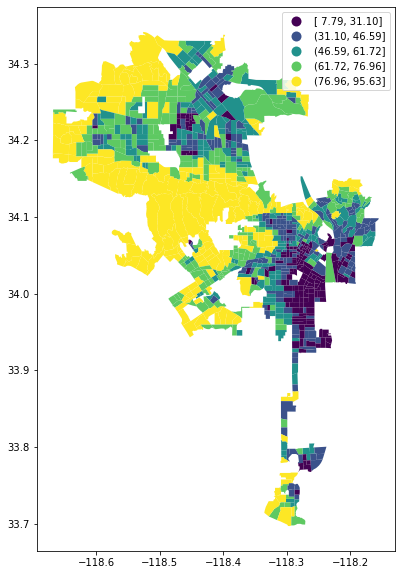

In [26]:
LA.plot(figsize=(12,10),
                 column='Abovepoverty',
                 legend=True, 
                 scheme='natural_breaks',)

In [27]:
#A look at race next

In [28]:
desired_columns = ['CensusTract','white_pct',]
HPI [desired_columns]
HPI_white = HPI [desired_columns]
HPI_white

,CensusTract,white_pct
0,06037101110,56.140351
1,06037101122,66.512009
2,06037101210,48.247078
3,06037101220,49.420161
4,06037101300,75.970469
...,...,...
981,06037297300,64.363943
982,06037297400,75.187344
983,06037297500,59.519659
984,06037297601,50.115651


In [29]:
columns = list(HPI_white)
columns

['CensusTract', 'white_pct']

In [30]:
HPI_white.columns = ['FIPS',
 'white_pct']

In [31]:
HPI_white.head ()

,FIPS,white_pct
0,06037101110,56.140351
1,06037101122,66.512009
2,06037101210,48.247078
3,06037101220,49.420161
4,06037101300,75.970469


In [32]:
import geopandas as gpd

In [33]:
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')

In [34]:
lacounty = lacounty[['name','geometry']]

In [35]:
lacounty.columns = ['FIPS','geometry']

In [36]:
LA = lacounty.merge(HPI_white,on='FIPS')

In [37]:
LA.head ()

,FIPS,geometry,white_pct
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",56.140351
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",66.512009
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",48.247078
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",49.420161
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",75.970469


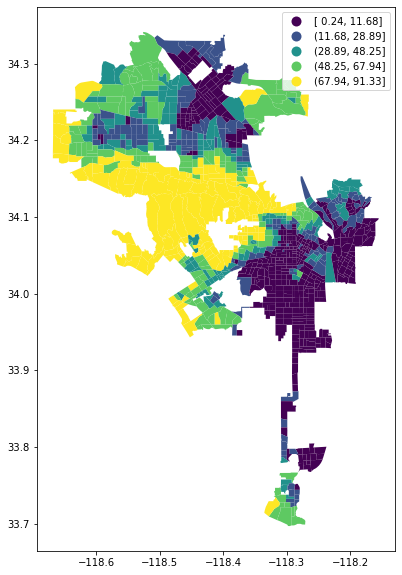

In [38]:
LA.plot(figsize=(12,10),
                 column='white_pct',
                 legend=True, 
                 scheme='natural_breaks')

In [39]:
desired_columns = ['CensusTract','black_pct',]
HPI [desired_columns]
HPI_black= HPI [desired_columns]
HPI_black

,CensusTract,black_pct
0,06037101110,1.564151
1,06037101122,0.709607
2,06037101210,3.055092
3,06037101220,1.070473
4,06037101300,0.976423
...,...,...
981,06037297300,4.507161
982,06037297400,1.887316
983,06037297500,3.621925
984,06037297601,11.141095


In [40]:
columns = list(HPI_black)
columns
HPI_black.columns = ['FIPS',
 'black_pct']
HPI_black. head()

,FIPS,black_pct
0,06037101110,1.564151
1,06037101122,0.709607
2,06037101210,3.055092
3,06037101220,1.070473
4,06037101300,0.976423


In [41]:
import geopandas as gpd
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty = lacounty[['name','geometry']]
lacounty.columns = ['FIPS','geometry']
LA = lacounty.merge(HPI_black,on='FIPS')

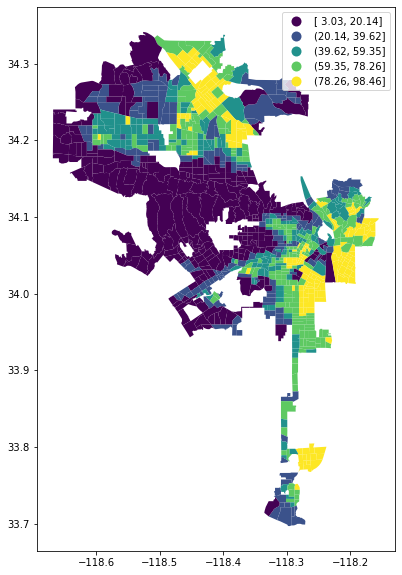

In [43]:
desired_columns = ['CensusTract','latino_pct',]
HPI [desired_columns]
HPI_latino= HPI [desired_columns]
HPI_latino
columns = list(HPI_latino)
columns
HPI_latino.columns = ['FIPS',
 'latino_pct']
import geopandas as gpd
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty = lacounty[['name','geometry']]
lacounty.columns = ['FIPS','geometry']
LA = lacounty.merge(HPI_latino,on='FIPS')
LA.plot(figsize=(12,10),
                 column='latino_pct',
                 legend=True, 
                 scheme='natural_breaks')

In [44]:
desired_columns = ['CensusTract','asian_pct',]


In [45]:
HPI [desired_columns]
HPI_asian= HPI [desired_columns]
HPI_asian

,CensusTract,asian_pct
0,06037101110,10.272670
1,06037101122,13.509825
2,06037101210,7.479132
3,06037101220,8.088017
4,06037101300,7.549417
...,...,...
981,06037297300,4.759899
982,06037297400,4.412989
983,06037297500,4.338563
984,06037297601,5.127217


In [46]:
columns = list(HPI_asian)
columns
HPI_asian.columns = ['FIPS',
 'asian_pct']

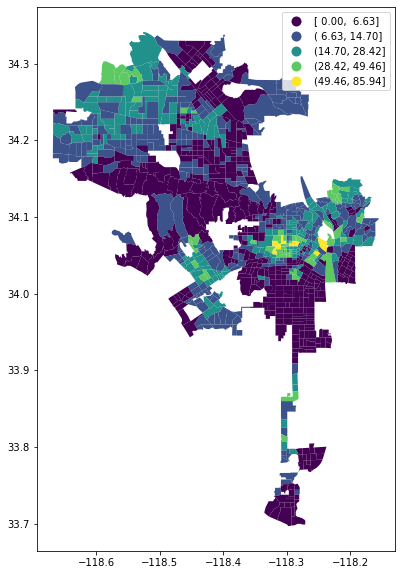

In [47]:
import geopandas as gpd
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty = lacounty[['name','geometry']]
lacounty.columns = ['FIPS','geometry']
LA = lacounty.merge(HPI_asian,on='FIPS')
LA.plot(figsize=(12,10),
                 column='asian_pct',
                 legend=True, 
                 scheme='natural_breaks')